In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options

driver = webdriver.Chrome()




queries = ["Image+to+Image+Translation", "Generative+adversarial+Networks", "Image+Translation", "Deep+Learning"]
pages = 50
scrap_dict = dict()



url = f'https://scholar.google.com/scholar?hl=fr&q=&start={0}'
driver.get(url)


input("Press ENTER after filling CAPTCHA")


for q in queries:
    titles_peer_queries, years_peer_queries = [], []

    for i in range(0, pages*10, 10):
        url = f'https://scholar.google.com/scholar?hl=fr&q={q}&start={i}&scisbd=1'

        driver.get(url)

        captcha = None

        try:
            driver.implicitly_wait(1.5)
            captcha = driver.find_element(By.XPATH, '//*[@id="gs_captcha_ccl"]')
        except:
            pass
        
        if captcha is not None:
            print("HERE IS A CAPTCHA")
            input("Press ENTER after filling CAPTCHA")

        titles = driver.find_elements(By.CLASS_NAME, "gs_rt")
        links = driver.find_elements(By.CLASS_NAME, "gs_a")

        titles_peer_queries.extend([str(t.text) for t in titles])
        years_peer_queries.extend([l.text.split(",")[-1].split("-")[0] for l in links])

    print(titles_peer_queries)
    print(years_peer_queries)

    scrap_dict[q] = [titles_peer_queries, years_peer_queries]

driver.close()


In [87]:
import pandas as pd
standard_queries = ["Image-to-Image Translation", "Generative Adversarial Networks", "Image Translation", "Deep Learning"]
title_key = queries[0]
[titles, years] = scrap_dict[title_key]
df = pd.DataFrame(data=[titles, years]).T
df.columns = ["titles", "years"]
df["category"] = standard_queries[0]

for i in range(1, len(queries)):
    [titles, years] = scrap_dict[queries[i]]
    df_tmp = pd.DataFrame(data=[titles, years]).T
    df_tmp.columns = ["titles", "years"]
    df_tmp["category"] = standard_queries[i]

    df = pd.concat([df, df_tmp])






In [88]:
df

,titles,years,category
0,Unsupervised image-to-image translation networks,2017,Image-to-Image Translation
1,Deep generative adversarial networks for image...,2020,Image-to-Image Translation
2,Multimodal unsupervised image-to-image transla...,2018,Image-to-Image Translation
3,Toward multimodal image-to-image translation,2017,Image-to-Image Translation
4,Image to image translation for domain adaptation,2018,Image-to-Image Translation
...,...,...,...
405,Deep learning in medical image registration: a...,2020,Deep Learning
406,Monocular depth estimation based on deep learn...,2020,Deep Learning
407,Portfolio optimization with return prediction ...,2021,Deep Learning
408,Vulnerability detection with deep learning,2017,Deep Learning


In [89]:
df.to_csv("scrap.csv", sep=";")

In [90]:
df['years'] = pd.to_numeric(df['years'], errors='coerce')
df = df.dropna()
df = df[df['years'] > 2000.0]

In [91]:
df

,titles,years,category
0,Unsupervised image-to-image translation networks,2017.0,Image-to-Image Translation
1,Deep generative adversarial networks for image...,2020.0,Image-to-Image Translation
2,Multimodal unsupervised image-to-image transla...,2018.0,Image-to-Image Translation
3,Toward multimodal image-to-image translation,2017.0,Image-to-Image Translation
4,Image to image translation for domain adaptation,2018.0,Image-to-Image Translation
...,...,...,...
405,Deep learning in medical image registration: a...,2020.0,Deep Learning
406,Monocular depth estimation based on deep learn...,2020.0,Deep Learning
407,Portfolio optimization with return prediction ...,2021.0,Deep Learning
408,Vulnerability detection with deep learning,2017.0,Deep Learning


In [92]:
test = df.groupby(["category", 'years']).count()

In [93]:
test = test.reset_index()

In [94]:
test

,category,years,titles
0,Deep Learning,2003.0,1
1,Deep Learning,2004.0,1
2,Deep Learning,2005.0,1
3,Deep Learning,2007.0,2
4,Deep Learning,2009.0,2
...,...,...,...
63,Image-to-Image Translation,2018.0,82
64,Image-to-Image Translation,2019.0,88
65,Image-to-Image Translation,2020.0,92
66,Image-to-Image Translation,2021.0,50


In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

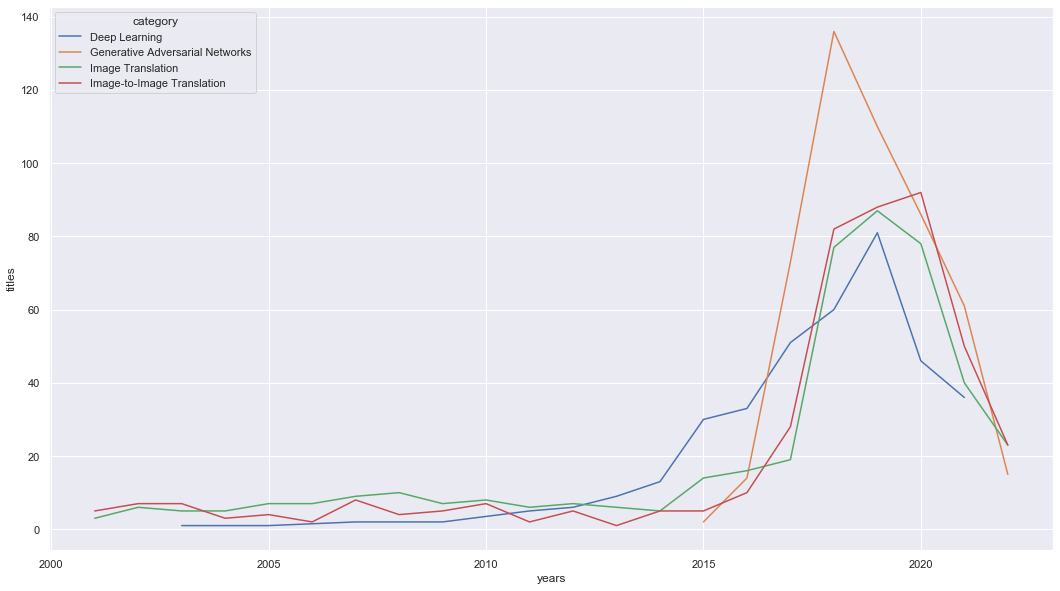

In [96]:
plt.figure(figsize=(18,10))
sns.lineplot(data=test, x='years', y="titles", hue="category")
plt.savefig("curves.png")